In [1]:
year = 'Summer2018UL'

In [27]:
nonml_savein = f'plots/nonML/{year}'
import os
if not os.path.exists(nonml_savein + '/root_files'): os.makedirs(nonml_savein + '/root_files')

In [3]:
import pyhf
pyhf.set_backend("jax")
import uproot as up

In [4]:
bias_data = Data(get_data(run=year), gnn_model=False)

[15:49:28] Loading Summer2018UL/btag_pt/JetHT_Data_UL/ntuple.root...                                  ]8;id=670303;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=348106;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\

In [5]:
bias_data.nevents

247939

In [6]:
bias_data.spherical_region()
bias_data.train()

REGION: concentric
0.65
.. training in validation region

.. training in analysis region



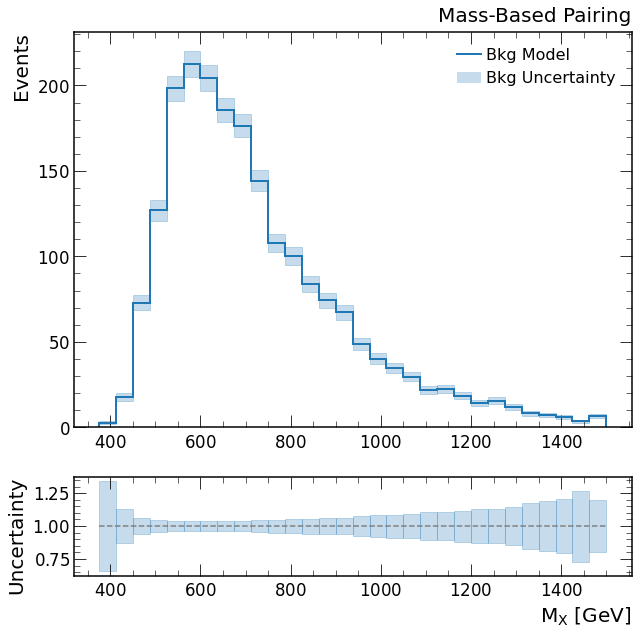

In [7]:
fig, ax, n_bias_model = bias_data.sr_hist(savein=f'{nonml_savein}/data_asr_model_bias.root')
ax[0].set_title('Mass-Based Pairing')
fig.savefig(f'{nonml_savein}/sr_model.pdf')

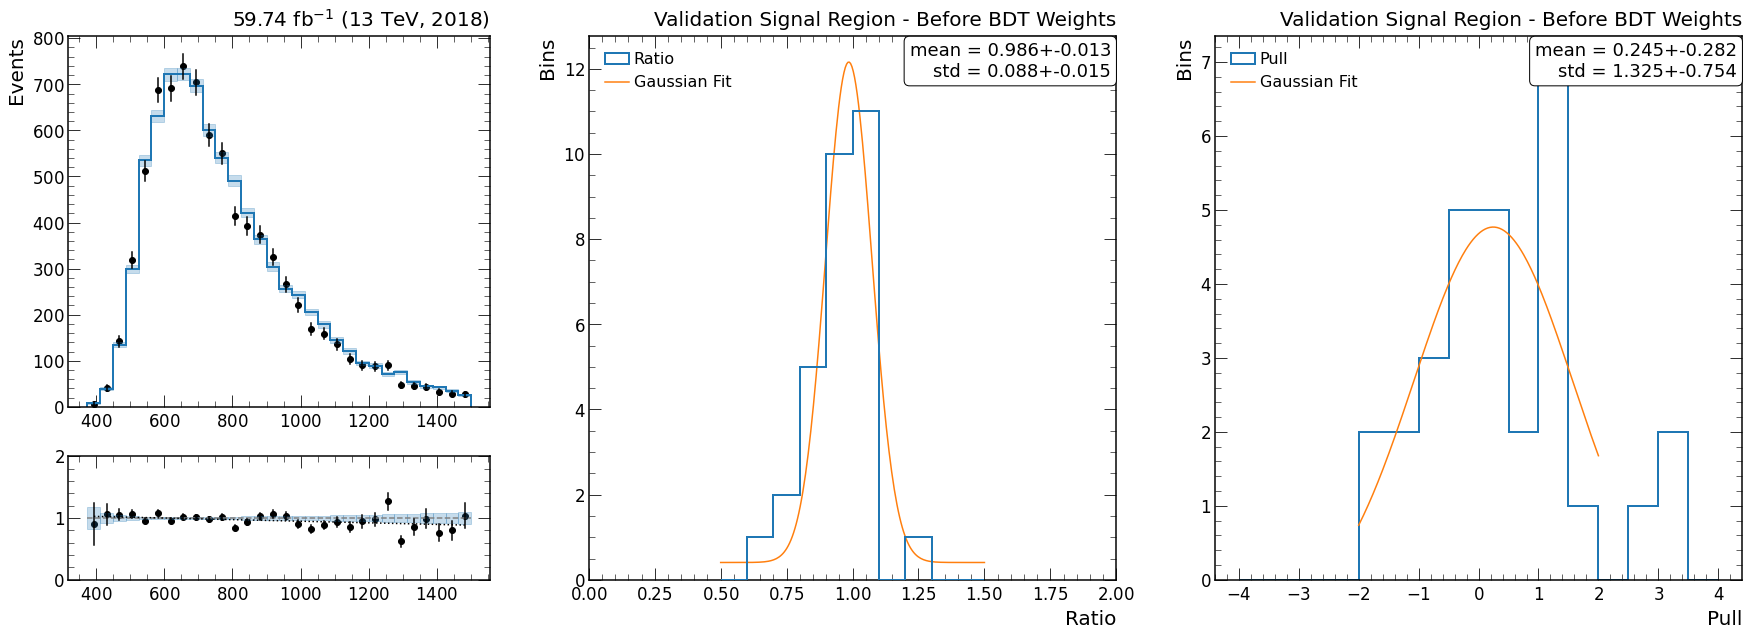

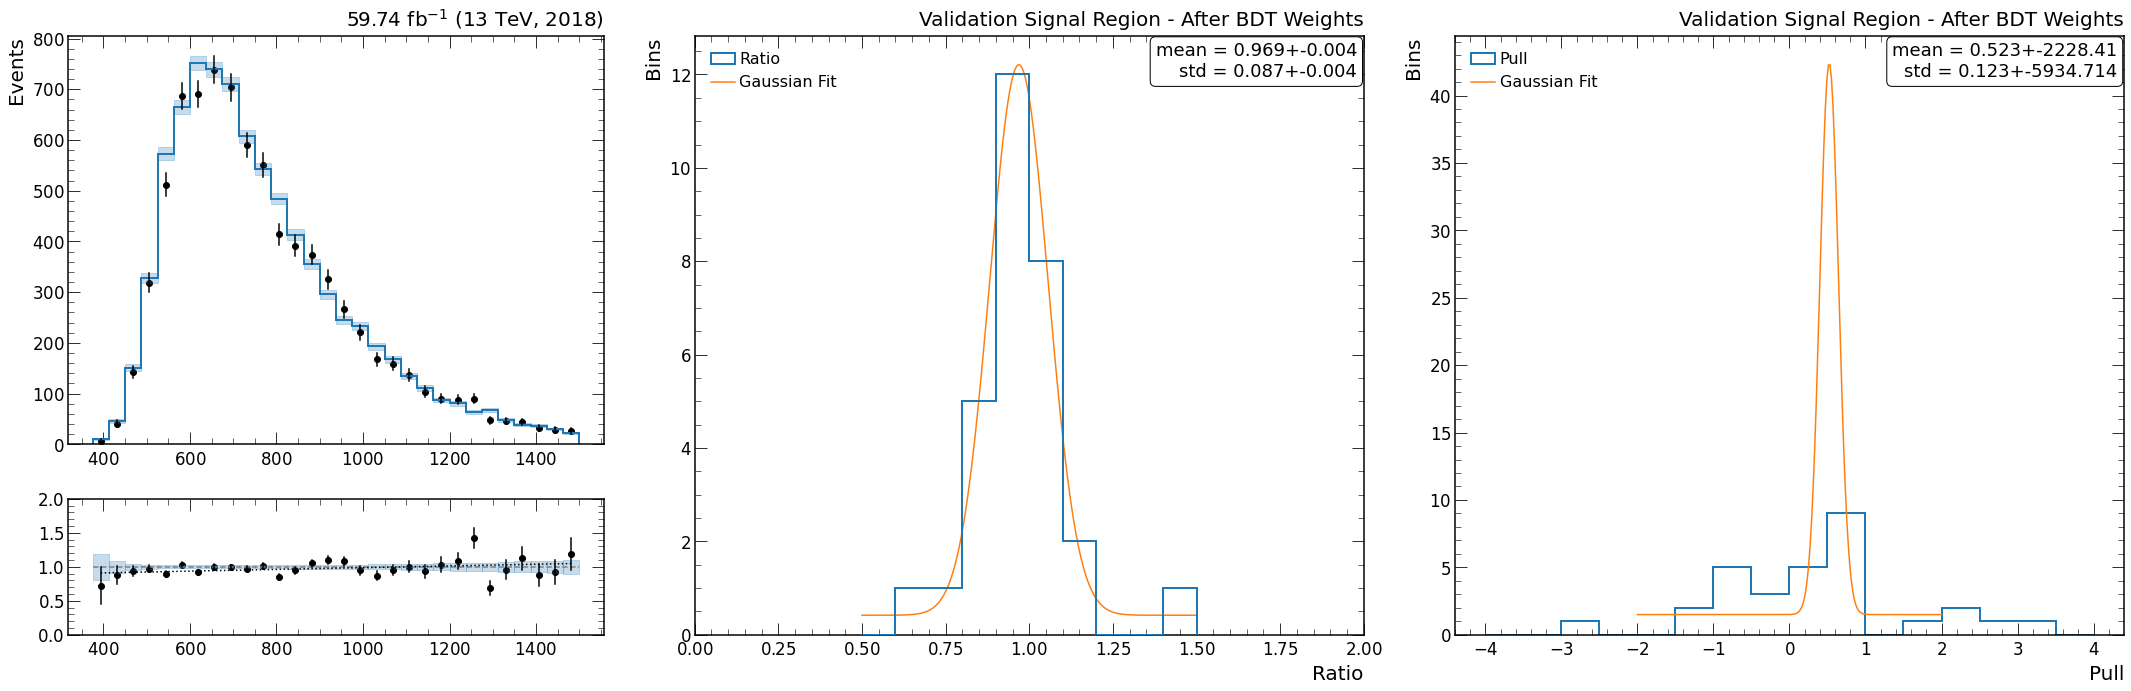

In [8]:
bias_data.pull_plots(savein=nonml_savein, filename='bias_pull')

In [9]:
# bias_data.v_sr_hist()
# # gnn_data.v_sr_hist()
# gnn_4b_data.v_sr_hist()

In [10]:
from array import array
import ROOT
ROOT.gROOT.SetBatch(True)

In [11]:
nbins = len(bias_data.mBins)

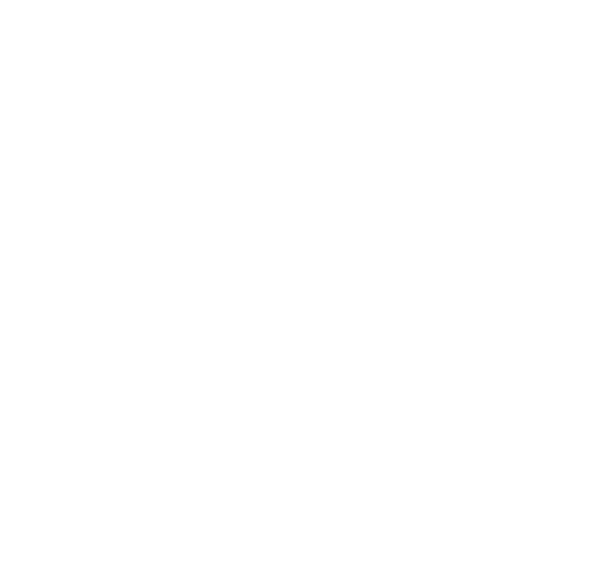

In [12]:
try: del canvas, ROOT_hist
except: pass

# fout = ROOT.TFile(f"plots/gnn/feynnet/data_asr_model_bias.root","recreate")
filename = f"{nonml_savein}/nonML_data_asr_model.root"
fout = ROOT.TFile(filename,"recreate")
fout.cd()

canvas = ROOT.TCanvas('c1','c1', 600, 600)
canvas.SetFrameLineWidth(3)
canvas.Draw()

h_title = f"data"
ROOT_hist = ROOT.TH1D(h_title,";m_{X} [GeV];Events",nbins-1,array('d',list(bias_data.mBins)))
for i,(val) in enumerate(n_bias_model):
    ROOT_hist.SetBinContent(i+1, val) 

ROOT_hist.Draw("hist")
ROOT_hist.Write()
fout.Close()
# fout.Save()
# ROOT.gStyle.SetOptStat(0)

h_data_nonML = up.open(filename)['data']

In [13]:
import subprocess, shlex

In [14]:
poi = np.linspace(0.1, 5, 50)
level = 0.05

In [15]:
def get_stats(h_data, h_signal):
    norm = 2*np.sqrt(np.sum(h_data.errors()**2))/h_signal.counts().sum()
    w = pyhf.simplemodels.uncorrelated_background(signal=(norm*h_signal.counts()).tolist(), bkg=h_data.counts().tolist(), bkg_uncertainty=h_data.errors().tolist())
    data = h_data.counts().tolist() + w.config.auxdata

    obs_limit, exp_limit, (scan, results) = pyhf.infer.intervals.upperlimit(
          data, w, poi, level=level, return_results=True
      )
    obs_limit, exp_limit = norm*obs_limit, [ norm*lim for lim in exp_limit ]
    return norm, w, data, obs_limit, exp_limit

In [16]:
base = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM'
cmd = f"ls {base}"
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8')
output = output.split('\n')
output = [f"{base}/{out}/ntuple.root" for out in output if out.startswith('NMSSM')]
# output

In [17]:
# nonML_signal = [SixB(out) for out in output]

nonML_signal = []
for out in output:
    try: nonML_signal.append(SixB(out))
    except: continue

[15:50:20] Loading model:                                                                             ]8;id=572252;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=21429;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=34873;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=296265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:50:22] Loading                                                                                    ]8;id=265751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=469951;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:24] Loading model:                                                                             ]8;id=590559;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=508804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=806040;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=657168;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:50:26] Loading                                                                                    ]8;id=882105;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=600239;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:28] Loading model:                                                                             ]8;id=708229;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=764154;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=644694;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=488600;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:50:30] Loading                                                                                    ]8;id=693260;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=754377;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:32] Loading model:                                                                             ]8;id=32150;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=866576;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=570834;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=202811;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:50:34] Loading                                                                                    ]8;id=344061;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=579360;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:36] Loading model:                                                                             ]8;id=291331;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=344863;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=148750;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=677482;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:50:39] Loading                                                                                    ]8;id=596313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=472697;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:41] Loading model:                                                                             ]8;id=547990;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=609408;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=176635;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=798871;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:50:43] Loading                                                                                    ]8;id=694834;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=941462;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:45] Loading model:                                                                             ]8;id=978700;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=628965;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=467499;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=422489;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:50:51] Loading                                                                                    ]8;id=72653;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=238433;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:50:56] Loading model:                                                                             ]8;id=740955;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=316421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=802504;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=187086;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:50:58] Loading                                                                                    ]8;id=668746;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=921612;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:00] Loading model:                                                                             ]8;id=782359;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=507629;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=599265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=924961;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:51:02] Loading                                                                                    ]8;id=111592;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=128303;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:04] Loading model:                                                                             ]8;id=939783;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=322059;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=839202;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=391514;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:51:06] Loading                                                                                    ]8;id=214633;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=924748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:08] Loading model:                                                                             ]8;id=896906;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=951579;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=726060;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=856887;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:51:10] Loading                                                                                    ]8;id=285564;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=802244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:12] Loading model:                                                                             ]8;id=302050;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=975718;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=16782;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=672201;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:51:14] Loading                                                                                    ]8;id=34957;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=48322;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:16] Loading model:                                                                             ]8;id=426237;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=878749;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=146855;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=294814;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:51:19] Loading                                                                                    ]8;id=327239;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=775582;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:20] Loading model:                                                                             ]8;id=34445;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=106553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=288912;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=340841;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:51:23] Loading                                                                                    ]8;id=673596;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=661267;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:25] Loading model:                                                                             ]8;id=549609;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=108555;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=761219;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=193400;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:51:27] Loading                                                                                    ]8;id=196033;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=301903;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:29] Loading model:                                                                             ]8;id=850642;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=379177;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=787397;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=428790;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:51:32] Loading                                                                                    ]8;id=14822;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=473264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:34] Loading model:                                                                             ]8;id=796507;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=769540;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=640149;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=784387;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:51:36] Loading                                                                                    ]8;id=870310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=588015;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:38] Loading model:                                                                             ]8;id=44333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=630765;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=111341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=621094;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:51:41] Loading                                                                                    ]8;id=721750;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=583740;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:43] Loading model:                                                                             ]8;id=179127;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=814373;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=854491;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=408446;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:51:45] Loading                                                                                    ]8;id=143145;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=969641;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:47] Loading model:                                                                             ]8;id=392395;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=674333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=714875;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=577676;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:51:50] Loading                                                                                    ]8;id=120520;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=274532;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:51:52] Loading model:                                                                             ]8;id=485334;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=990647;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=549119;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=30396;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:51:53] Loading                                                                                    ]8;id=114968;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=624559;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:51:55] Loading model:                                                                             ]8;id=192334;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=220088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=437632;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=341247;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:51:58] Loading                                                                                    ]8;id=740563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=861313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:00] Loading model:                                                                             ]8;id=714376;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=548751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=849606;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=539936;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:52:02] Loading                                                                                    ]8;id=170383;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=126501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:04] Loading model:                                                                             ]8;id=671926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=418425;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=356981;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=93713;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:52:06] Loading                                                                                    ]8;id=544112;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=244253;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:09] Loading model:                                                                             ]8;id=79946;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=374660;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=123470;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=919891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:52:11] Loading                                                                                    ]8;id=438969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=832470;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:14] Loading model:                                                                             ]8;id=918046;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=543641;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=771267;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=767241;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:52:16] Loading                                                                                    ]8;id=598950;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=237060;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:18] Loading model:                                                                             ]8;id=863516;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=572721;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=83;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=277137;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:52:21] Loading                                                                                    ]8;id=992385;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=262195;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:23] Loading model:                                                                             ]8;id=18054;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=876265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=822299;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=419880;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:52:25] Loading                                                                                    ]8;id=411638;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=172875;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:28] Loading model:                                                                             ]8;id=521262;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=326311;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=171905;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=772244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:52:30] Loading                                                                                    ]8;id=325380;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=446754;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:33] Loading model:                                                                             ]8;id=271871;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=128794;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=179548;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=145829;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:52:35] Loading                                                                                    ]8;id=624804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=283457;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:37] Loading model:                                                                             ]8;id=192743;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=406038;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=367738;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=605939;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:52:40] Loading                                                                                    ]8;id=629158;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=905670;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:52:42] Loading model:                                                                             ]8;id=444838;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=851898;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=820660;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=634668;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:52:45] Loading                                                                                    ]8;id=997762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=627628;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:52:46] Loading model:                                                                             ]8;id=337920;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=982581;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=883282;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=980060;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:52:48] Loading                                                                                    ]8;id=962004;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=640264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:50] Loading model:                                                                             ]8;id=586478;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=294469;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=991865;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=853500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:52:52] Loading                                                                                    ]8;id=147171;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=887189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:54] Loading model:                                                                             ]8;id=224813;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=876373;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=205728;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=114765;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:52:56] Loading                                                                                    ]8;id=258178;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=649500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:52:58] Loading model:                                                                             ]8;id=718895;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=532152;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=963788;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=906280;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:53:01] Loading                                                                                    ]8;id=135706;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=620917;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:03] Loading model:                                                                             ]8;id=340150;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=53563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=345192;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=72043;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:53:05] Loading                                                                                    ]8;id=354793;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=818853;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:07] Loading model:                                                                             ]8;id=866937;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=461189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=959641;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=393141;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:53:09] Loading                                                                                    ]8;id=164492;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=205592;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:11] Loading model:                                                                             ]8;id=13418;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=21531;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=304079;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=321475;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:53:14] Loading                                                                                    ]8;id=476751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=532648;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:17] Loading model:                                                                             ]8;id=789469;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=954252;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=444457;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=315162;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:53:19] Loading                                                                                    ]8;id=707162;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=693578;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:21] Loading model:                                                                             ]8;id=618743;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=323255;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=689698;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284881;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1300_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:53:24] Loading                                                                                    ]8;id=292223;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=223165;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1300_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:26] Loading model:                                                                             ]8;id=421926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=412021;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=819789;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=484877;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:53:29] Loading                                                                                    ]8;id=114345;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=226319;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:53:31] Loading model:                                                                             ]8;id=268447;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=805407;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=320395;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=852920;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:53:33] Loading                                                                                    ]8;id=796733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=59864;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:53:35] Loading model:                                                                             ]8;id=803957;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=499065;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=386804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=112065;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:53:38] Loading                                                                                    ]8;id=621679;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=684428;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:53:39] Loading model:                                                                             ]8;id=143025;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=410077;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=619104;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=306176;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:53:41] Loading                                                                                    ]8;id=516548;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=647565;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:43] Loading model:                                                                             ]8;id=757993;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=586811;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=424133;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=605894;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:53:45] Loading                                                                                    ]8;id=998954;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=511141;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:47] Loading model:                                                                             ]8;id=378941;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=156091;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=191711;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=614347;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:53:49] Loading                                                                                    ]8;id=66470;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=328548;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:51] Loading model:                                                                             ]8;id=813393;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=787396;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=40097;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=857732;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:53:54] Loading                                                                                    ]8;id=453723;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=379795;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:53:56] Loading model:                                                                             ]8;id=620219;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=778659;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=177829;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=2978;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:53:58] Loading                                                                                    ]8;id=518833;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=667002;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:00] Loading model:                                                                             ]8;id=248478;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=196344;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=948553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=271959;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:54:03] Loading                                                                                    ]8;id=320243;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=835433;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:05] Loading model:                                                                             ]8;id=34468;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=180836;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=768466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=357133;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:54:08] Loading                                                                                    ]8;id=537905;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=343457;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:10] Loading model:                                                                             ]8;id=14145;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=278844;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=778538;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=917199;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:54:13] Loading                                                                                    ]8;id=946816;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=759787;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:15] Loading model:                                                                             ]8;id=873839;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=154733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=412478;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=451616;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1400_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1400_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:54:18] Loading                                                                                    ]8;id=720798;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=317911;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1400_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:20] Loading model:                                                                             ]8;id=880739;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=543718;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=14899;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=622701;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:54:22] Loading model:                                                                             ]8;id=117471;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=79912;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=108677;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=816240;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:54:25] Loading                                                                                    ]8;id=595150;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=189210;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:54:27] Loading model:                                                                             ]8;id=670710;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=565612;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=381424;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=46570;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:54:30] Loading                                                                                    ]8;id=357406;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=994486;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:54:32] Loading model:                                                                             ]8;id=247805;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=606688;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=958896;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=50977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[15:54:35] Loading                                                                                    ]8;id=403355;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=497430;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:54:37] Loading model:                                                                             ]8;id=3029;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=708239;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=464043;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=114736;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:54:39] Loading                                                                                    ]8;id=767870;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=214497;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:41] Loading model:                                                                             ]8;id=742269;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=901091;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=138452;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=684370;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:54:43] Loading                                                                                    ]8;id=413094;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=960713;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:46] Loading model:                                                                             ]8;id=117006;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=732826;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=490900;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=23326;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:54:48] Loading                                                                                    ]8;id=58670;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=904075;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:50] Loading model:                                                                             ]8;id=543115;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=34354;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=929113;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=391456;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:54:53] Loading                                                                                    ]8;id=621823;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=350586;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:54:55] Loading model:                                                                             ]8;id=424908;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=433401;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=398498;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=237851;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:54:58] Loading                                                                                    ]8;id=112124;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=411013;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:00] Loading model:                                                                             ]8;id=635609;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=370111;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=652621;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=521822;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:55:03] Loading                                                                                    ]8;id=974985;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=758964;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:06] Loading model:                                                                             ]8;id=557370;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=83051;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=497308;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=425434;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:55:09] Loading                                                                                    ]8;id=858472;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=304314;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:11] Loading model:                                                                             ]8;id=55919;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=520804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=809322;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=173939;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:55:14] Loading                                                                                    ]8;id=837939;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=428664;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:17] Loading model:                                                                             ]8;id=1034;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=873589;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=922264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=449548;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:55:19] Loading                                                                                    ]8;id=442893;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=486100;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:22] Loading model:                                                                             ]8;id=245037;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=687206;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=830292;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=410498;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1500_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1500_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:55:25] Loading                                                                                    ]8;id=786685;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=389973;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1500_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:28] Loading model:                                                                             ]8;id=4427;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=136327;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=620689;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=926490;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:55:30] Loading                                                                                    ]8;id=711141;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=364431;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:55:33] Loading model:                                                                             ]8;id=45995;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=998908;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=622652;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=774017;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:55:36] Loading                                                                                    ]8;id=800547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=774424;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:55:39] Loading model:                                                                             ]8;id=207196;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=174693;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=744392;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=975157;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:55:41] Loading                                                                                    ]8;id=68151;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=415760;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:55:44] Loading model:                                                                             ]8;id=928909;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=692054;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=114124;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=165638;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[15:55:47] Loading                                                                                    ]8;id=394920;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=661451;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:55:49] Loading model:                                                                             ]8;id=267333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=8756;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=293479;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=55730;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-1400_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-1400_TuneCP5_13TeV-madgraph-pythia8


[15:55:51] Loading                                                                                    ]8;id=19535;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=24549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:55:54] Loading model:                                                                             ]8;id=292967;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=479177;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=466403;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=992117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:55:56] Loading                                                                                    ]8;id=713816;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=651757;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:55:58] Loading model:                                                                             ]8;id=363244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=357610;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=595633;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=995727;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:56:00] Loading                                                                                    ]8;id=661711;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=175140;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:02] Loading model:                                                                             ]8;id=612695;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=14808;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=808591;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=281807;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:56:05] Loading model:                                                                             ]8;id=211962;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=265268;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=420118;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=899701;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:56:07] Loading                                                                                    ]8;id=442217;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=249418;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:09] Loading model:                                                                             ]8;id=721264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=985994;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=700227;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=626984;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:56:12] Loading                                                                                    ]8;id=668183;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=746524;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:14] Loading model:                                                                             ]8;id=43358;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=533731;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=690570;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=198296;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:56:17] Loading                                                                                    ]8;id=762716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=851750;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:19] Loading model:                                                                             ]8;id=21446;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=176993;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=881764;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=806405;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:56:22] Loading                                                                                    ]8;id=259822;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=266066;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:25] Loading model:                                                                             ]8;id=276424;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=541120;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=12341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=971716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:56:28] Loading                                                                                    ]8;id=84904;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=3128;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:30] Loading model:                                                                             ]8;id=167190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=901973;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=539980;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=232214;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:56:33] Loading                                                                                    ]8;id=58648;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=637945;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:35] Loading model:                                                                             ]8;id=956345;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=434200;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=924298;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=820240;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1600_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1600_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:56:38] Loading                                                                                    ]8;id=572705;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=598969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1600_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:56:41] Loading model:                                                                             ]8;id=448281;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=413271;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=270272;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=483923;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:56:44] Loading                                                                                    ]8;id=554459;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=818152;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:56:46] Loading model:                                                                             ]8;id=500549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=517144;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=859069;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=85352;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:56:49] Loading                                                                                    ]8;id=523576;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=804970;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:56:52] Loading model:                                                                             ]8;id=857141;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=187579;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=208813;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=78028;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:56:54] Loading                                                                                    ]8;id=391858;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=214203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:56:57] Loading model:                                                                             ]8;id=478436;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=82459;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=99271;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=126064;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[15:57:00] Loading                                                                                    ]8;id=552730;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=34516;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:57:02] Loading model:                                                                             ]8;id=212397;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=44233;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=703868;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=741587;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-1400_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-1400_TuneCP5_13TeV-madgraph-pythia8


[15:57:05] Loading                                                                                    ]8;id=961037;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=28948;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:57:07] Loading model:                                                                             ]8;id=750095;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=521319;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=213722;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=622166;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:57:09] Loading                                                                                    ]8;id=504655;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=92023;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:11] Loading model:                                                                             ]8;id=569074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=408580;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=247617;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=742001;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:57:13] Loading                                                                                    ]8;id=72390;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=95838;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:15] Loading model:                                                                             ]8;id=162044;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=839362;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=814587;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=414402;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:57:18] Loading                                                                                    ]8;id=697352;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=299830;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:20] Loading model:                                                                             ]8;id=854458;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=349695;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=553249;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=902882;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:57:23] Loading                                                                                    ]8;id=115103;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=476207;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:25] Loading model:                                                                             ]8;id=607596;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=477680;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=789917;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=195424;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:57:27] Loading                                                                                    ]8;id=660474;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=909125;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:30] Loading model:                                                                             ]8;id=51189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=863701;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=131171;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=311892;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:57:32] Loading                                                                                    ]8;id=956790;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=30819;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:35] Loading model:                                                                             ]8;id=762216;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=296583;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=688429;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=297735;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:57:38] Loading                                                                                    ]8;id=424088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=757318;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:40] Loading model:                                                                             ]8;id=465805;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=973211;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=310434;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=187619;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:57:43] Loading                                                                                    ]8;id=85765;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=820809;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:45] Loading model:                                                                             ]8;id=515727;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=188826;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=593225;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=809952;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:57:48] Loading                                                                                    ]8;id=352001;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=53326;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:51] Loading model:                                                                             ]8;id=824023;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=641309;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=347500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=286995;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1700_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1700_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:57:53] Loading                                                                                    ]8;id=44377;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=665020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1700_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:57:56] Loading model:                                                                             ]8;id=290623;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=859011;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=839536;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=46222;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:57:59] Loading                                                                                    ]8;id=673037;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=7478;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:01] Loading model:                                                                             ]8;id=843122;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=214891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=680697;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=97798;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:58:04] Loading                                                                                    ]8;id=78880;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=849433;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:06] Loading model:                                                                             ]8;id=910985;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=744197;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=523228;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284529;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:58:09] Loading                                                                                    ]8;id=425208;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=257716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:12] Loading model:                                                                             ]8;id=321891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=749624;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=660553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=318449;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[15:58:15] Loading                                                                                    ]8;id=511011;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=280082;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:17] Loading model:                                                                             ]8;id=631054;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=407812;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=754960;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=836383;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1400_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1400_TuneCP5_13TeV-madgraph-pythia8


[15:58:20] Loading                                                                                    ]8;id=937567;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=167516;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:22] Loading model:                                                                             ]8;id=989073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=779356;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=482982;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=751269;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-1600_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-1600_TuneCP5_13TeV-madgraph-pythia8


[15:58:25] Loading                                                                                    ]8;id=86681;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=198318;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:58:26] Loading model:                                                                             ]8;id=825571;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=382611;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=493633;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=781785;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:58:28] Loading                                                                                    ]8;id=796144;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=675315;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:30] Loading model:                                                                             ]8;id=510214;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=126786;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=857563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=874132;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:58:32] Loading                                                                                    ]8;id=255204;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=741182;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:33] Loading model:                                                                             ]8;id=268812;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=916949;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=216642;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=925556;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:58:36] Loading                                                                                    ]8;id=190203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=238541;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:37] Loading model:                                                                             ]8;id=185260;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=283439;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=760342;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=772827;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:58:40] Loading                                                                                    ]8;id=290161;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=419339;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:42] Loading model:                                                                             ]8;id=37255;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=307669;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=51232;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=122174;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:58:44] Loading                                                                                    ]8;id=432509;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=455892;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:46] Loading model:                                                                             ]8;id=457046;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=420511;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=983074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=432044;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-500_TuneCP5_13TeV-madgraph-pythia8


[15:58:49] Loading                                                                                    ]8;id=798175;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=183347;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:51] Loading model:                                                                             ]8;id=846630;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=984403;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=820690;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=165399;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-600_TuneCP5_13TeV-madgraph-pythia8


[15:58:53] Loading                                                                                    ]8;id=718742;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=505667;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:58:55] Loading model:                                                                             ]8;id=420465;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=650887;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=387547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=288324;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-700_TuneCP5_13TeV-madgraph-pythia8


[15:58:58] Loading                                                                                    ]8;id=778988;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=876265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:00] Loading model:                                                                             ]8;id=660218;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=843284;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=256201;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=212990;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-800_TuneCP5_13TeV-madgraph-pythia8


[15:59:03] Loading                                                                                    ]8;id=36332;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=967456;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:05] Loading model:                                                                             ]8;id=560359;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120158;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=441705;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=665921;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1800_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1800_MY-900_TuneCP5_13TeV-madgraph-pythia8


[15:59:08] Loading                                                                                    ]8;id=602931;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=378755;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1800_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:10] Loading model:                                                                             ]8;id=188659;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=818387;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=491163;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=620619;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[15:59:12] Loading                                                                                    ]8;id=400531;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=82171;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:15] Loading model:                                                                             ]8;id=860052;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=735027;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=707096;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=312121;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[15:59:18] Loading                                                                                    ]8;id=80981;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=440374;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:20] Loading model:                                                                             ]8;id=466802;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=108878;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=528256;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=278522;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[15:59:22] Loading                                                                                    ]8;id=572404;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=446592;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:23] Loading model:                                                                             ]8;id=734151;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=623200;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=714592;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=614078;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[15:59:26] Loading                                                                                    ]8;id=847153;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=303840;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:28] Loading model:                                                                             ]8;id=88647;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=332083;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=765338;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=991270;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1400_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1400_TuneCP5_13TeV-madgraph-pythia8


[15:59:31] Loading                                                                                    ]8;id=438293;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=824781;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:33] Loading model:                                                                             ]8;id=730633;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=70671;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=405607;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=975755;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-1600_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-1600_TuneCP5_13TeV-madgraph-pythia8


[15:59:35] Loading                                                                                    ]8;id=623402;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=156689;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[15:59:37] Loading model:                                                                             ]8;id=885923;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=656097;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=979053;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=845204;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-250_TuneCP5_13TeV-madgraph-pythia8


[15:59:39] Loading                                                                                    ]8;id=762798;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=919642;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:41] Loading model:                                                                             ]8;id=878347;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=257260;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=446837;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=109833;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-300_TuneCP5_13TeV-madgraph-pythia8


[15:59:43] Loading                                                                                    ]8;id=309053;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=674637;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:45] Loading model:                                                                             ]8;id=835804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=952348;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=189924;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=74306;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-350_TuneCP5_13TeV-madgraph-pythia8


[15:59:48] Loading                                                                                    ]8;id=866748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=31310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:50] Loading model:                                                                             ]8;id=267317;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=624942;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=528875;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=460672;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-400_TuneCP5_13TeV-madgraph-pythia8


[15:59:52] Loading                                                                                    ]8;id=127162;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=835117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[15:59:55] Loading model:                                                                             ]8;id=443694;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=964205;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=493078;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=573427;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-450_TuneCP5_13TeV-madgraph-pythia8


[15:59:57] Loading                                                                                    ]8;id=20787;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=598510;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:00] Loading model:                                                                             ]8;id=331238;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=905783;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=882463;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=85071;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:00:02] Loading                                                                                    ]8;id=527233;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=893305;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:04] Loading model:                                                                             ]8;id=53275;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=6751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=701241;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=726879;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:00:07] Loading                                                                                    ]8;id=101;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=85056;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:09] Loading model:                                                                             ]8;id=295075;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=489671;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=606733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=499624;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-700_TuneCP5_13TeV-madgraph-pythia8


[16:00:12] Loading                                                                                    ]8;id=4987;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=27442;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:15] Loading model:                                                                             ]8;id=36012;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=800248;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=553692;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=814124;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-800_TuneCP5_13TeV-madgraph-pythia8


[16:00:18] Loading                                                                                    ]8;id=482901;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=63052;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:20] Loading model:                                                                             ]8;id=677983;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=530728;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=429701;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=562451;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1900_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1900_MY-900_TuneCP5_13TeV-madgraph-pythia8


[16:00:23] Loading                                                                                    ]8;id=333189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=778072;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1900_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:00:25] Loading model:                                                                             ]8;id=748202;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=653720;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=382266;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=142896;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[16:00:28] Loading                                                                                    ]8;id=372595;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=652077;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:31] Loading model:                                                                             ]8;id=741317;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=832513;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=236178;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=848767;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1100_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1100_TuneCP5_13TeV-madgraph-pythia8


[16:00:34] Loading                                                                                    ]8;id=322646;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=595968;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1100_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:36] Loading model:                                                                             ]8;id=368288;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=935861;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=868108;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=74435;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1200_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1200_TuneCP5_13TeV-madgraph-pythia8


[16:00:39] Loading                                                                                    ]8;id=585595;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=717983;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1200_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:41] Loading model:                                                                             ]8;id=242471;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=462573;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=108134;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=638507;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1300_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1300_TuneCP5_13TeV-madgraph-pythia8


[16:00:44] Loading                                                                                    ]8;id=523142;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=400312;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1300_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:46] Loading model:                                                                             ]8;id=500224;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=587205;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=366399;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=930956;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1400_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1400_TuneCP5_13TeV-madgraph-pythia8


[16:00:50] Loading                                                                                    ]8;id=602714;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=382292;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1400_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:52] Loading model:                                                                             ]8;id=210319;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=103190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=406136;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=439964;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-1600_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-1600_TuneCP5_13TeV-madgraph-pythia8


[16:00:55] Loading                                                                                    ]8;id=576137;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=683612;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-1600_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[16:00:57] Loading model:                                                                             ]8;id=332742;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=546996;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=319925;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=68111;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:00:59] Loading                                                                                    ]8;id=615017;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=369084;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:01] Loading model:                                                                             ]8;id=124187;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=804133;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=189423;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=731363;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:01:03] Loading                                                                                    ]8;id=612096;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=253118;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:05] Loading model:                                                                             ]8;id=301190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=482036;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=863807;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=48341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:01:07] Loading                                                                                    ]8;id=246688;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=890950;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:09] Loading model:                                                                             ]8;id=728771;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=864088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=375166;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=62134;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:01:12] Loading                                                                                    ]8;id=375899;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=594346;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:14] Loading model:                                                                             ]8;id=655353;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=603794;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=954084;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=88655;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:01:17] Loading                                                                                    ]8;id=943258;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=526085;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:19] Loading model:                                                                             ]8;id=845646;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=312651;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=344355;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=593564;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:01:22] Loading                                                                                    ]8;id=340809;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=917639;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:24] Loading model:                                                                             ]8;id=375321;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=619977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=187177;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=943469;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-700_TuneCP5_13TeV-madgraph-pythia8


[16:01:27] Loading                                                                                    ]8;id=762433;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=242245;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:29] Loading model:                                                                             ]8;id=236440;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=73987;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=988225;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=990427;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-800_TuneCP5_13TeV-madgraph-pythia8


[16:01:32] Loading                                                                                    ]8;id=327023;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=787129;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:34] Loading model:                                                                             ]8;id=766153;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=16962;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=515287;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=113033;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-2000_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-2000_MY-900_TuneCP5_13TeV-madgraph-pythia8


[16:01:37] Loading                                                                                    ]8;id=67408;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=183590;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-2000_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[16:01:40] Loading model:                                                                             ]8;id=205363;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=667448;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=806499;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=345585;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:01:42] Loading                                                                                    ]8;id=455339;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=785099;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:01:43] Loading model:                                                                             ]8;id=89886;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=614481;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=721996;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=989223;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:01:46] Loading                                                                                    ]8;id=117637;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=253678;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:01:47] Loading model:                                                                             ]8;id=352766;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=150995;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=850100;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=62175;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:01:53] Loading model:                                                                             ]8;id=499112;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=688926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=67577;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=1966;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:01:56] Loading                                                                                    ]8;id=987693;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=317452;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:01:58] Loading model:                                                                             ]8;id=261501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=187748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=272526;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=908099;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:02:01] Loading                                                                                    ]8;id=802216;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=686651;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:03] Loading model:                                                                             ]8;id=618928;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120545;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=302817;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=687780;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:02:06] Loading                                                                                    ]8;id=502676;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=279840;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:08] Loading model:                                                                             ]8;id=950214;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=611771;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=499920;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=921023;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:02:11] Loading                                                                                    ]8;id=660152;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=450714;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:13] Loading model:                                                                             ]8;id=286310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=541530;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=659321;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=956004;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:02:16] Loading                                                                                    ]8;id=951077;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=139714;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:18] Loading model:                                                                             ]8;id=178270;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=68103;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=257872;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=714074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:02:21] Loading                                                                                    ]8;id=619306;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=311467;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:23] Loading model:                                                                             ]8;id=181167;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=945730;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=785251;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=32804;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:02:26] Loading                                                                                    ]8;id=358115;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=601075;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:28] Loading model:                                                                             ]8;id=922113;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=387365;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=135977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=747162;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:02:31] Loading                                                                                    ]8;id=932241;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=594902;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:33] Loading model:                                                                             ]8;id=750438;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=966667;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=494418;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=970090;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:02:36] Loading                                                                                    ]8;id=312550;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=463026;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:38] Loading model:                                                                             ]8;id=265958;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=664879;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=118142;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=73901;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:02:41] Loading                                                                                    ]8;id=381537;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=448456;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:43] Loading model:                                                                             ]8;id=284186;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=864330;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=461073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=743616;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:02:46] Loading                                                                                    ]8;id=586007;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=543265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:48] Loading model:                                                                             ]8;id=419145;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=868437;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=15298;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=401792;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:02:51] Loading                                                                                    ]8;id=594768;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=512439;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:53] Loading model:                                                                             ]8;id=924194;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=368305;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=372894;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=904339;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:02:56] Loading                                                                                    ]8;id=18609;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=933117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:02:58] Loading model:                                                                             ]8;id=374902;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=875863;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=231903;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=440051;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:03:01] Loading                                                                                    ]8;id=816918;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=457900;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:03] Loading model:                                                                             ]8;id=3623;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=864233;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=973375;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=190237;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:03:07] Loading                                                                                    ]8;id=33013;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=902292;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:09] Loading model:                                                                             ]8;id=610849;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=388036;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=410550;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=404534;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:03:12] Loading                                                                                    ]8;id=976210;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=396373;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:14] Loading model:                                                                             ]8;id=123285;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=162691;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=721692;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=572134;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:03:17] Loading                                                                                    ]8;id=718661;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=57411;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:19] Loading model:                                                                             ]8;id=733670;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=257512;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=733333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=88990;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:03:23] Loading                                                                                    ]8;id=326007;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=974693;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:25] Loading model:                                                                             ]8;id=852405;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=2428;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=229417;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=103578;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:03:28] Loading                                                                                    ]8;id=131246;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=783261;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:30] Loading model:                                                                             ]8;id=973930;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=573975;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=653794;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=602421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:03:33] Loading                                                                                    ]8;id=383520;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=832696;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:35] Loading model:                                                                             ]8;id=715037;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=190340;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=172127;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=335563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:03:39] Loading model:                                                                             ]8;id=460656;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=457971;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=965195;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=362372;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:03:44] Loading                                                                                    ]8;id=434783;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=516564;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:48] Loading model:                                                                             ]8;id=964130;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=113863;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=680825;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=786510;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:03:51] Loading                                                                                    ]8;id=410680;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=105462;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:53] Loading model:                                                                             ]8;id=389509;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=439722;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=474977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120353;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:03:56] Loading                                                                                    ]8;id=498019;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=41674;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:03:59] Loading model:                                                                             ]8;id=985053;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=232756;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=214806;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=808893;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:04:02] Loading                                                                                    ]8;id=602269;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=898886;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:04] Loading model:                                                                             ]8;id=874416;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=675246;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=132078;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=834763;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:04:07] Loading                                                                                    ]8;id=246416;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=543894;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:10] Loading model:                                                                             ]8;id=255687;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=567166;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=714882;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=227035;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:04:13] Loading                                                                                    ]8;id=701661;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=804713;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:15] Loading model:                                                                             ]8;id=197549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=793117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=10376;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=442271;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:04:19] Loading                                                                                    ]8;id=410182;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=646131;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:21] Loading model:                                                                             ]8;id=879377;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=804595;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=781589;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=277359;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:04:25] Loading                                                                                    ]8;id=666763;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=124549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:27] Loading model:                                                                             ]8;id=501286;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=808015;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=447497;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=766899;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:04:31] Loading                                                                                    ]8;id=378891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=610278;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:33] Loading model:                                                                             ]8;id=723403;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=303386;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=267972;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=435826;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:04:36] Loading                                                                                    ]8;id=671203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=253615;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:39] Loading model:                                                                             ]8;id=543202;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=585428;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=668442;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=391947;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:04:42] Loading                                                                                    ]8;id=377541;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=933431;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:44] Loading model:                                                                             ]8;id=471488;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=436114;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=469140;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=810893;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:04:47] Loading                                                                                    ]8;id=895352;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=583786;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:50] Loading model:                                                                             ]8;id=807279;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=99760;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=888911;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=724761;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:04:53] Loading                                                                                    ]8;id=882749;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=505694;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:04:55] Loading model:                                                                             ]8;id=750124;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=525951;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=619773;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=567782;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:04:59] Loading model:                                                                             ]8;id=280511;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=25168;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=429356;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=15484;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:05:02] Loading                                                                                    ]8;id=433416;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=875852;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:04] Loading model:                                                                             ]8;id=271412;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=59202;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=544507;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=589490;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:05:07] Loading                                                                                    ]8;id=184279;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=614809;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:10] Loading model:                                                                             ]8;id=415053;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=380832;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=377114;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=370757;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:05:13] Loading                                                                                    ]8;id=775517;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=929310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:15] Loading model:                                                                             ]8;id=561428;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=616160;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=235953;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=419087;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:05:18] Loading                                                                                    ]8;id=741012;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=517769;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:20] Loading model:                                                                             ]8;id=362676;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=370675;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=670379;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=87367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:05:24] Loading                                                                                    ]8;id=823999;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=141333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:26] Loading model:                                                                             ]8;id=77411;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=961243;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=16706;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=206887;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:05:30] Loading                                                                                    ]8;id=859101;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=210753;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:32] Loading model:                                                                             ]8;id=269234;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=456559;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=392324;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=270975;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:05:35] Loading                                                                                    ]8;id=551588;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=42106;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:38] Loading model:                                                                             ]8;id=941717;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=580301;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=555911;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=261881;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:05:41] Loading                                                                                    ]8;id=295679;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=756179;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:43] Loading model:                                                                             ]8;id=13860;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=29367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=231695;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=446060;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:05:47] Loading                                                                                    ]8;id=470194;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=629843;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:49] Loading model:                                                                             ]8;id=318099;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=438193;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=225034;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=13300;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:05:52] Loading                                                                                    ]8;id=802313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=355961;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:05:54] Loading model:                                                                             ]8;id=527263;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=453502;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=913792;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=665216;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8


[16:05:58] Loading                                                                                    ]8;id=46002;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=771186;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:00] Loading model:                                                                             ]8;id=46308;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=811247;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=836526;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=361638;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:06:03] Loading                                                                                    ]8;id=514362;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=186721;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:05] Loading model:                                                                             ]8;id=505785;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=840674;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=239590;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=124515;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:06:13] Loading                                                                                    ]8;id=568169;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=501140;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:18] Loading model:                                                                             ]8;id=366075;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=257421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=174472;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=24074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:06:21] Loading                                                                                    ]8;id=964976;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=658953;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:23] Loading model:                                                                             ]8;id=221104;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=311334;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=576454;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=72969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:06:27] Loading                                                                                    ]8;id=384195;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=279602;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:29] Loading model:                                                                             ]8;id=457000;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=554020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=566974;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=392134;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:06:32] Loading                                                                                    ]8;id=875715;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=109179;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:35] Loading model:                                                                             ]8;id=318668;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=777095;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=766522;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=969058;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:06:38] Loading                                                                                    ]8;id=706879;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=232367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:40] Loading model:                                                                             ]8;id=804716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=942923;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=698901;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=330877;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:06:44] Loading                                                                                    ]8;id=771675;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=390960;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:46] Loading model:                                                                             ]8;id=892117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=992657;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=921677;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=61479;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8


[16:06:49] Loading                                                                                    ]8;id=593288;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=696142;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:51] Loading model:                                                                             ]8;id=182117;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=831716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=265788;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=728921;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8


[16:06:55] Loading                                                                                    ]8;id=667561;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=476080;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:06:57] Loading model:                                                                             ]8;id=557129;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=979797;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=845829;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=771316;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8


[16:07:01] Loading                                                                                    ]8;id=511256;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=825208;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:02] Loading model:                                                                             ]8;id=98246;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=411631;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=814150;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=924368;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8


[16:07:06] Loading                                                                                    ]8;id=344226;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=511607;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:08] Loading model:                                                                             ]8;id=595231;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=972752;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=806288;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=639259;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8


[16:07:11] Loading                                                                                    ]8;id=828027;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=320784;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:13] Loading model:                                                                             ]8;id=344536;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=134431;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=394239;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=826563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8


[16:07:17] Loading                                                                                    ]8;id=852128;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=428231;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:19] Loading model:                                                                             ]8;id=835171;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=626275;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=639401;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=930878;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8


[16:07:23] Loading                                                                                    ]8;id=34023;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=850189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:25] Loading model:                                                                             ]8;id=908032;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=723671;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=892707;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=497585;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8


[16:07:28] Loading                                                                                    ]8;id=239547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=864949;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:31] Loading model:                                                                             ]8;id=975769;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=292024;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=502025;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=482565;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8


[16:07:34] Loading                                                                                    ]8;id=258843;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=107364;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[16:07:36] Loading model:                                                                             ]8;id=97748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=501118;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=448572;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=731623;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8


[16:07:40] Loading                                                                                    ]8;id=796977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=199128;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                       

In [18]:
[tree.spherical_region() for tree in nonML_signal]

REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: concentric
REGION: conc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [19]:
print(np.unique([signal.mx for signal in nonML_signal]))

[ 400  450  500  550  600  650  700  750  800  850  900  950 1000 1100
 1200 1300 1400 1500 1600 1700 1800 1900 2000]


In [20]:
MX = np.unique([signal.mx for signal in nonML_signal])
MY = np.unique([signal.my for signal in nonML_signal])

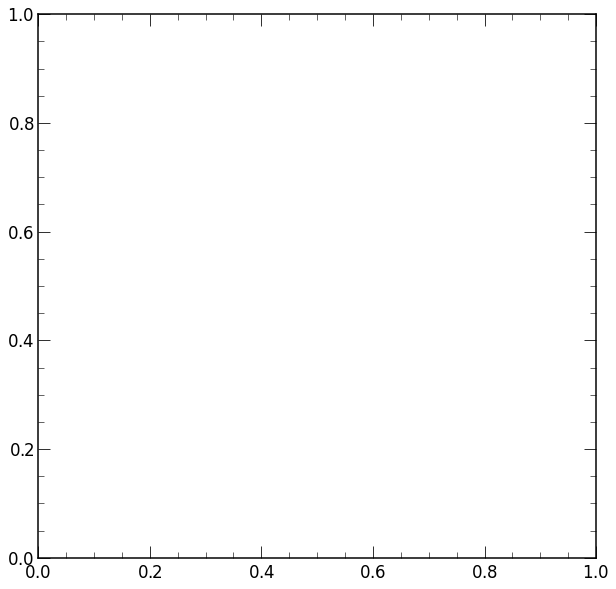

In [21]:
fig, ax = plt.subplots()

In [22]:
nonML_n = {mx : {} for mx in MX}
for nonML in nonML_signal:
    nonML_n[nonML.mx][nonML.my] = nonML.hist(nonML.X.m[nonML.asr_hs_mask], bins=np.linspace(375,2000,31), ax=ax)

In [23]:
# import pandas as pd

In [24]:
# df_gnn = pd.concat({k: pd.DataFrame(v).T for k, v in gnn_n.items()}, axis=0)
# df_nonML = pd.concat({k: pd.DataFrame(v).T for k, v in nonML_n.items()}, axis=0)

In [25]:
# df_gnn

400 250


450 250
500 250
500 300
500 350
550 250
550 300
550 350
550 400
600 250
600 300
600 350
600 400
600 450
650 250
650 300
650 350
650 400
650 450
650 500
700 250
700 300
700 400
700 450
700 500
750 250
750 300
750 350
750 400
750 450
750 500
750 600
800 250
800 300
800 350
800 450
800 500
800 600
850 250
850 300
850 350
850 400
850 450
850 500
850 600
850 700
900 250
900 300
900 350
900 400
900 450
900 500
900 600
900 700
950 250
950 300
950 350
950 400
950 450
950 500
950 600
950 700
950 800
1000 250
1000 300
1000 350
1000 400
1000 450
1000 500
1000 600
1000 700
1000 800
1100 250
1100 300
1100 350
1100 400
1100 450
1100 500
1100 600
1100 700
1100 800
1100 900
1200 1000
1200 250
1200 300
1200 350
1200 400
1200 450
1200 500
1200 600
1200 700
1200 800
1200 900
1300 1000
1300 1100
1300 250
1300 300
1300 350
1300 400
1300 450
1300 600
1300 700
1300 800
1300 900
1400 1000
1400 1100
1400 1200
1400 250
1400 300
1400 350
1400 450
1400 500
1400 600
1400 700
1400 800
1400 900
1500 1100
1500 1200
1

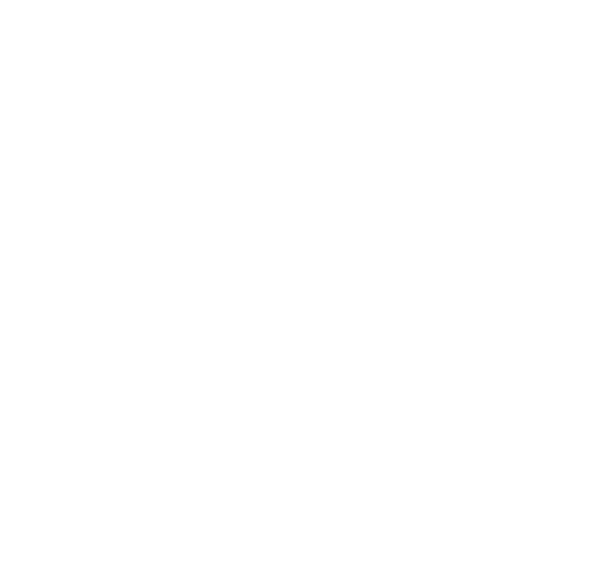

In [28]:
h_nonML = {mx : {} for mx in MX}
limit_nonML = {mx : {} for mx in MX}
limit_my_nonML = {my : {} for my in MY}

for mx in nonML_n.keys():
    for my in nonML_n[mx]:
        print(mx, my)
        v = nonML_n[mx][my]
        # print(gnn_n[mx][my])
        try: del canvas, ROOT_hist
        except: pass
        filename = f"{nonml_savein}/root_files/n_asr_{mx}_{my}.root"
        fout = ROOT.TFile(filename,"recreate")
        fout.cd()

        canvas = ROOT.TCanvas('c1','c1', 600, 600)
        canvas.SetFrameLineWidth(3)
        canvas.Draw()

        h_title = f"signal"
        ROOT_hist = ROOT.TH1D(h_title,";m_{X} [GeV];Events",nbins-1,array('d',list(bias_data.mBins)))
        for i,(val) in enumerate(v):
            ROOT_hist.SetBinContent(i+1, val) 

        ROOT_hist.Draw("hist")
        ROOT_hist.Write()
        fout.Close()

        h_nonML[mx][my] = up.open(filename)['signal']
        norm, w, data, obs_limit, exp_limit = get_stats(h_data_nonML, h_nonML[mx][my])
        limit_nonML[mx][my] = np.array(exp_limit)*300
        limit_my_nonML[my][mx] = list(np.array(exp_limit)*300)

In [29]:
limit_my_nonML = {my:{} for my in MY}

for mx in limit_nonML.keys():
    for my in limit_nonML[mx].keys():
        limit_my_nonML[my][mx] = limit_nonML[mx][my]

/tmp/ipykernel_43346/1377177227.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  limits = np.column_stack((v for v in limit_my_nonML[my].values()))


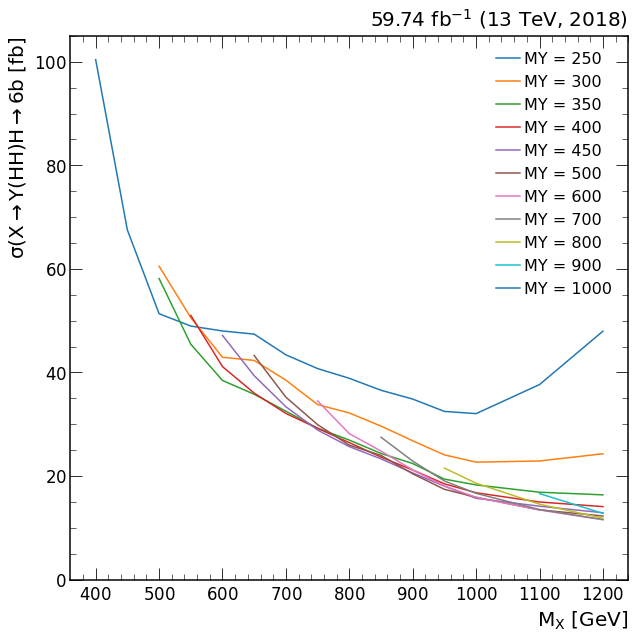

In [30]:
fig, ax = plt.subplots()

for my in limit_my_nonML.keys():
    if my > 1000: continue
    # print([mx for mx in limit_my_nonML[my].keys()])
    x = [mx for mx in limit_my_nonML[my].keys()]
    index = [i for i,mx in enumerate(x) if mx > 1200][0]
    x = x[:index]
    # print(np.column_stack((v for v in limit_my_nonML[my].values())))
    limits = np.column_stack((v for v in limit_my_nonML[my].values()))
    limits = limits[:,:index]
    
    # ax.fill_between(x, limits[0,:], limits[1,:], color='gold')
    # ax.fill_between(x, limits[1,:], limits[3,:], color='mediumseagreen')
    # ax.fill_between(x, limits[3,:], limits[4,:], color='gold')
    ax.plot(x, limits[2,:], label=f'MY = {my}')
    # break

ax.legend()
ax.set_ylabel(r"$\sigma(X\rightarrow Y(HH)H \rightarrow 6b$ [fb]")
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_title(bias_data.sample)
ax.set_ylim(0,105)

# ax.text(0.4,0.75,'Non-ML Method',transform=ax.transAxes,ha='center')

fig.savefig(f'{nonml_savein}/nonML_limits.pdf')

In [ ]:
import pandas as pd

In [ ]:
import json

In [ ]:
limit_my_nonML

{250: {400: [36.38198005856562,
   59.23401582312694,
   72.00751554356127,
   107.05036611078323,
   155.80208523068785],
  450: [26.984285435948518,
   31.616885516408182,
   45.120590016837184,
   62.19598378048381,
   84.60180147023563],
  500: [20.05032906289704,
   26.404862206195066,
   36.08803998032312,
   51.23474235365421,
   68.9636334695793],
  550: [20.325372331555975,
   27.395712373356844,
   38.45630133280466,
   53.161135112226894,
   71.609243449684],
  600: [21.932759178499367,
   29.23744412683526,
   40.47203036887236,
   56.25947979363025,
   75.72415765918174],
  650: [23.071400298277176,
   30.68285388880599,
   42.248352447669696,
   58.957749665371104,
   79.04056618787654],
  700: [21.553298122395255,
   28.576238342936602,
   39.51239479350309,
   55.104636830631364,
   73.82142278854164],
  800: [20.022508892450976,
   26.753768107320564,
   36.86606462933802,
   51.22335433371288,
   68.92415229866035],
  850: [18.77397847246899,
   25.41628408325548,
   

In [ ]:
test_dict = {int(k):v for k,v in limit_my_nonML.items()}

In [ ]:
for my in limit_my_nonML.keys():
    x = [mx for mx in limit_my_nonML[my].keys()]
    print(x)
    # limits = np.column_stack((v for v in limit_my_nonML[my].values()))

[400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 1000, 1100, 1200]
[450, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1100, 1200]
[500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200]
[550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200]
[600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200]
[700, 750, 800, 850, 900, 950, 1000, 1100]
[750, 800, 850, 900, 950, 1000, 1100, 1200]
[850, 900, 950, 1000, 1100, 1200]
[950, 1000, 1100, 1200]
[1100, 1200]
[1200]


In [ ]:
with open(f'{nonml_savein}/limits.json', "w", encoding="utf8") as jsonfile:
    json.dump(limit_my_nonML, jsonfile)

In [ ]:
with open(f'{nonml_savein}/limits.json', "r", encoding="utf8") as jsonfile:
    outer_list = json.load(jsonfile)
outer_list

{'250': [400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 1000, 1100, 1200],
 '300': [450, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1100, 1200],
 '350': [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200],
 '400': [550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200],
 '450': [600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200],
 '500': [700, 750, 800, 850, 900, 950, 1000, 1100],
 '600': [750, 800, 850, 900, 950, 1000, 1100, 1200],
 '700': [850, 900, 950, 1000, 1100, 1200],
 '800': [950, 1000, 1100, 1200],
 '900': [1100, 1200],
 '1000': [1200]}

In [ ]:
df = pd.DataFrame.from_dict(limit_my_nonML)
df.to_csv(f'{nonml_savein}/gnn_limits.csv')

In [ ]:
test = pd.read_csv(f'{nonml_savein}/gnn_limits.csv')

In [ ]:
from ast import literal_eval

In [ ]:
MX = list(test['Unnamed: 0'])

In [ ]:
MY = [k for k in test.keys() if 'Unnamed' not in k]
MY

['250', '300', '350', '400', '450', '500', '600', '700', '800', '900', '1000']

In [ ]:
test['250']

0     [36.38198005856562, 59.23401582312694, 72.0075...
1     [26.984285435948518, 31.616885516408182, 45.12...
2     [20.05032906289704, 26.404862206195066, 36.088...
3     [20.325372331555975, 27.395712373356844, 38.45...
4     [21.932759178499367, 29.23744412683526, 40.472...
5     [23.071400298277176, 30.68285388880599, 42.248...
6     [21.553298122395255, 28.576238342936602, 39.51...
7     [20.022508892450976, 26.753768107320564, 36.86...
8     [18.77397847246899, 25.41628408325548, 35.0839...
9     [17.5711396838688, 23.264777471861947, 32.2200...
10    [16.80939686401946, 22.336946022460268, 30.583...
11    [17.161794687739523, 23.103605610627586, 32.31...
12    [19.811945358239093, 26.25307599840248, 35.449...
13                                                  NaN
14                                                  NaN
Name: 250, dtype: object

In [ ]:
lim_my_nonML = {int(my) : {} for my in MX}

for my in MY:
    my = int(my)
    for mx,t in zip(MX,list(test[str(my)])):
        mx = int(mx)
        try: 
            print(mx, my, literal_eval(t))
            lim_my_nonML[my][mx] = literal_eval(t)
        except: continue
lim_my_nonML.keys()

400 250 [36.38198005856562, 59.23401582312694, 72.00751554356127, 107.05036611078323, 155.80208523068785]
450 250 [26.984285435948518, 31.616885516408182, 45.120590016837184, 62.19598378048381, 84.60180147023563]
500 250 [20.05032906289704, 26.404862206195066, 36.08803998032312, 51.23474235365421, 68.9636334695793]
550 250 [20.325372331555975, 27.395712373356844, 38.45630133280466, 53.161135112226894, 71.609243449684]
600 250 [21.932759178499367, 29.23744412683526, 40.47203036887236, 56.25947979363025, 75.72415765918174]
650 250 [23.071400298277176, 30.68285388880599, 42.248352447669696, 58.957749665371104, 79.04056618787654]
700 250 [21.553298122395255, 28.576238342936602, 39.51239479350309, 55.104636830631364, 73.82142278854164]
800 250 [20.022508892450976, 26.753768107320564, 36.86606462933802, 51.22335433371288, 68.92415229866035]
850 250 [18.77397847246899, 25.41628408325548, 35.083988832729794, 48.73478354269612, 65.26149950927828]
900 250 [17.5711396838688, 23.264777471861947, 3

dict_keys([400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 1000, 1100, 1200, 750, 950])

In [ ]:
print([type(k) for k in lim_my_nonML.keys()])

[<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [ ]:
lim_my_nonML.keys()

dict_keys([400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 1000, 1100, 1200, 750, 950])

In [ ]:
[type(k) for k in lim_my_nonML.keys()]

[int, int, int, int, int, int, int, int, int, int, int, int, int, int, int]

In [ ]:
lim_my_nonML.keys()

dict_keys([400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 1000, 1100, 1200, 750, 950])

KeyError: 250

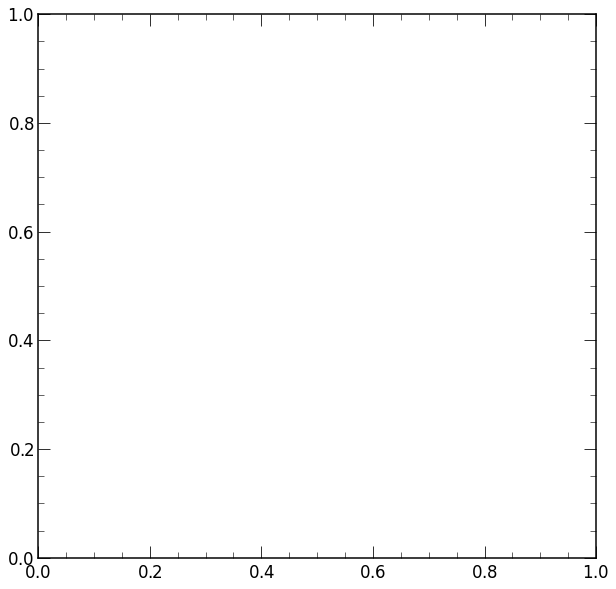

In [ ]:
fig, ax = plt.subplots()

for my in MY:
    my = int(my)
    print(lim_my_nonML[my].keys())
    # print([mx for mx in lim_my_nonML[my].keys()])
    x = [mx for mx in lim_my_nonML[my].keys()]
    print(my, x)
    # print(np.column_stack((v for v in limit_my_nonML[my].values())))
    limits = np.column_stack((v for v in lim_my_nonML[my].values()))

    
    # ax.fill_between(x, limits[0,:], limits[1,:], color='gold')
    # ax.fill_between(x, limits[1,:], limits[3,:], color='mediumseagreen')
    # ax.fill_between(x, limits[3,:], limits[4,:], color='gold')
    ax.plot(x, limits[2,:], label=f'MY = {my}')
    ax.plot(x, limits[2,:], label=f'MY = {my}')
    # break

ax.legend()
ax.set_ylabel(r"$\sigma(X\rightarrow Y(HH)H \rightarrow 6b$ [fb]")
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_title(bias_data.sample)

# ax.text(0.4,0.75,'Non-ML Method',transform=ax.transAxes,ha='center')

# fig.savefig(f'{nonml_savein}/nonML_limits.pdf')

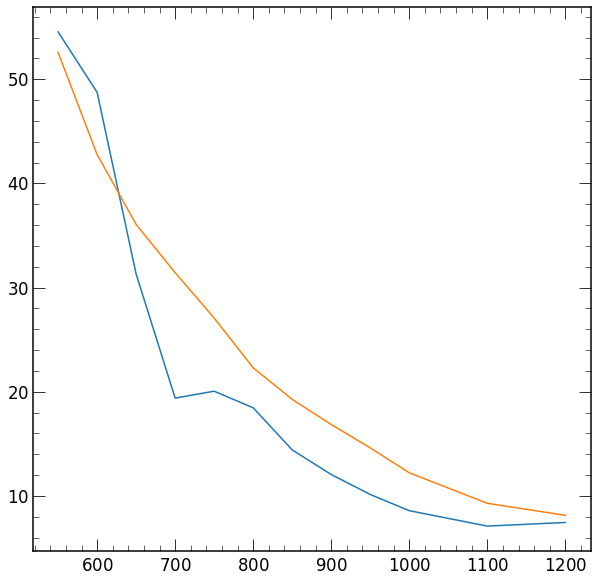

In [ ]:
my = 400

x_gnn = []
y_gnn = []
for mx in limit_my_gnn[my].keys():
    x_gnn.append(mx)
    y_gnn.append(limit_my_gnn[my][mx][2])

x_nonML = []
y_nonML = []
for mx in limit_my_nonML[my].keys():
    x_nonML.append(mx)
    y_nonML.append(limit_my_nonML[my][mx][2])

fig, ax = plt.subplots()

ax.plot(x_gnn,y_gnn)
ax.plot(x_nonML,y_nonML)

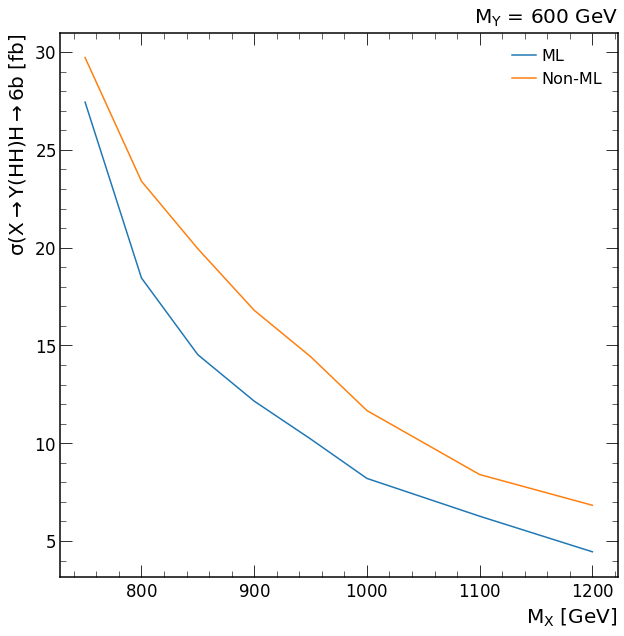

In [ ]:
my = 600

x_gnn = []
y_gnn = []
for mx in limit_my_gnn[my].keys():
    x_gnn.append(mx)
    y_gnn.append(limit_my_gnn[my][mx][2])

x_nonML = []
y_nonML = []
for mx in limit_my_nonML[my].keys():
    x_nonML.append(mx)
    y_nonML.append(limit_my_nonML[my][mx][2])

fig, ax = plt.subplots()

ax.plot(x_gnn,y_gnn, label='ML')
ax.plot(x_nonML,y_nonML, label='Non-ML')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r"$\sigma(X\rightarrow Y(HH)H \rightarrow 6b$ [fb]")
ax.legend()
ax.set_title(r'$M_Y$ = 600 GeV')

fig.savefig(f'{model_savein}/gnn_vs_nonML.pdf')

In [ ]:
model_savein

'plots/limit_plots/gnn/feynnet/20230414_ranger_lr0.0047_batch1024__13_mass_points_100_epochs_withbkg'

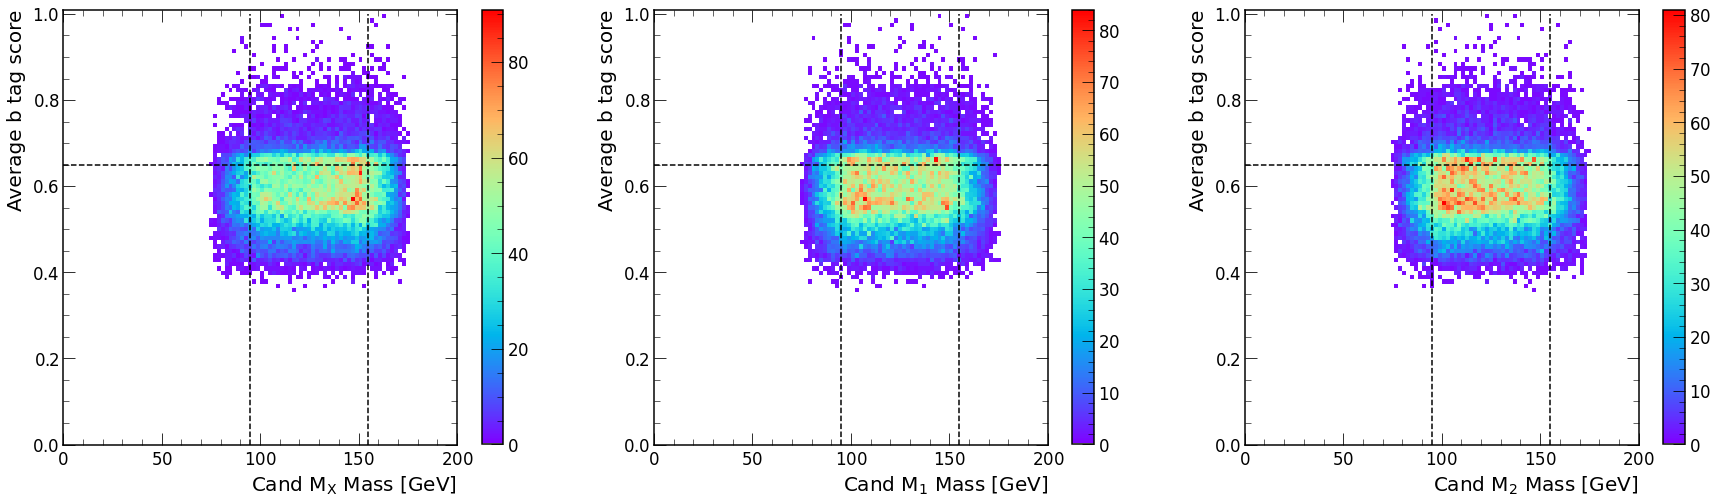

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(30,8))

n, xe, ye, imx = Hist2d(bias_data.HX.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[0])
n, xe, ye, im1 = Hist2d(bias_data.H1.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[1])
n, xe, ye, im2 = Hist2d(bias_data.H2.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[2])

fig.colorbar(imx, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])
# axs[0].set_title('Average DeepJet score and H cand mass for signal in SR')

for ax in axs.flatten():
    ax.plot([0,300],[0.65,0.65],'--',color='k')
    ax.plot([95,95],[0,1],'--',color='k')
    ax.plot([155,155],[0,1],'--',color='k')
    ax.set_ylabel('Average b tag score')

axs[0].set_xlabel(r'Cand $M_X$ Mass [GeV]')
axs[1].set_xlabel(r'Cand $M_1$ Mass [GeV]')
axs[2].set_xlabel(r'Cand $M_2$ Mass [GeV]')

fig.savefig('plots/gnn/feynnet/mh_v_avgbtag_mcbkg_nonML.pdf')

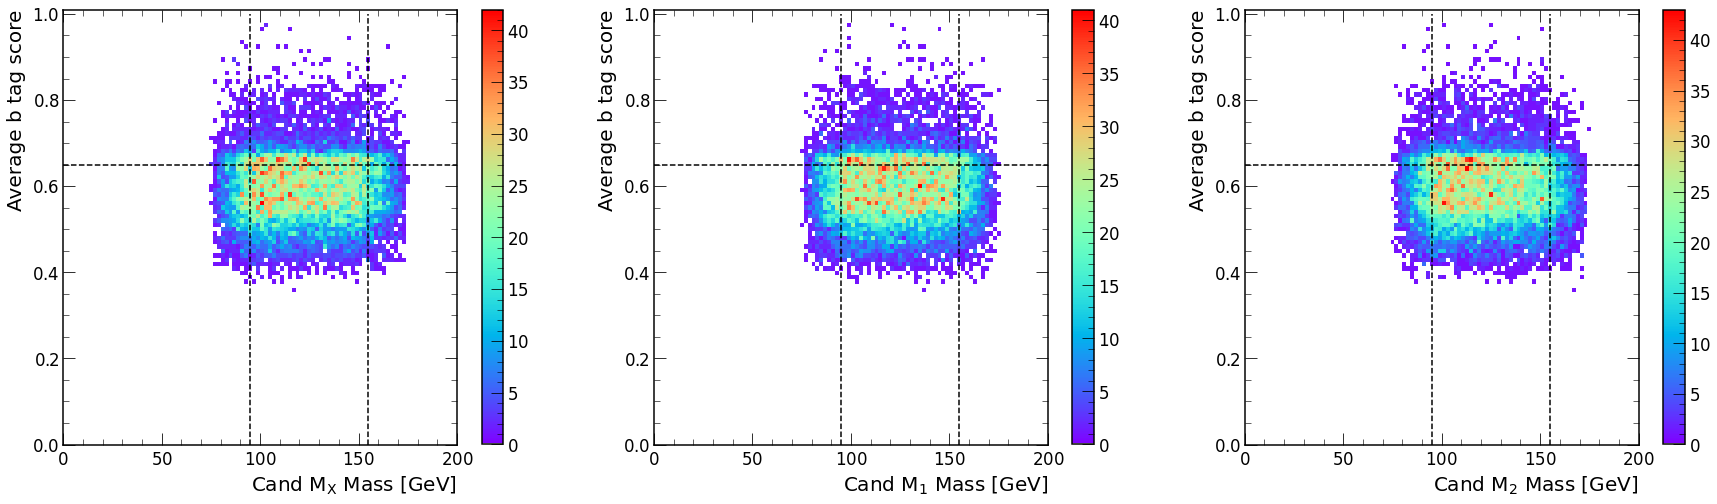

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(30,8))

n, xe, ye, imx = Hist2d(gnn_4b_data.HX.m[gnn_4b_data.acr_mask], gnn_4b_data.btag_avg[gnn_4b_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[0])
n, xe, ye, im1 = Hist2d(gnn_4b_data.H1.m[gnn_4b_data.acr_mask], gnn_4b_data.btag_avg[gnn_4b_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[1])
n, xe, ye, im2 = Hist2d(gnn_4b_data.H2.m[gnn_4b_data.acr_mask], gnn_4b_data.btag_avg[gnn_4b_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[2])

fig.colorbar(imx, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])
# axs[0].set_title('Average DeepJet score and H cand mass for signal in SR')

for ax in axs.flatten():
    ax.plot([0,300],[0.65,0.65],'--',color='k')
    ax.plot([95,95],[0,1],'--',color='k')
    ax.plot([155,155],[0,1],'--',color='k')
    ax.set_ylabel('Average b tag score')

axs[0].set_xlabel(r'Cand $M_X$ Mass [GeV]')
axs[1].set_xlabel(r'Cand $M_1$ Mass [GeV]')
axs[2].set_xlabel(r'Cand $M_2$ Mass [GeV]')

fig.savefig('plots/gnn/feynnet/mh_v_avgbtag_data_acr.pdf')

In [ ]:
x = np.linspace(-100,500,1000)
f = 1-np.exp(-(x-125)**2/(2*25**2))

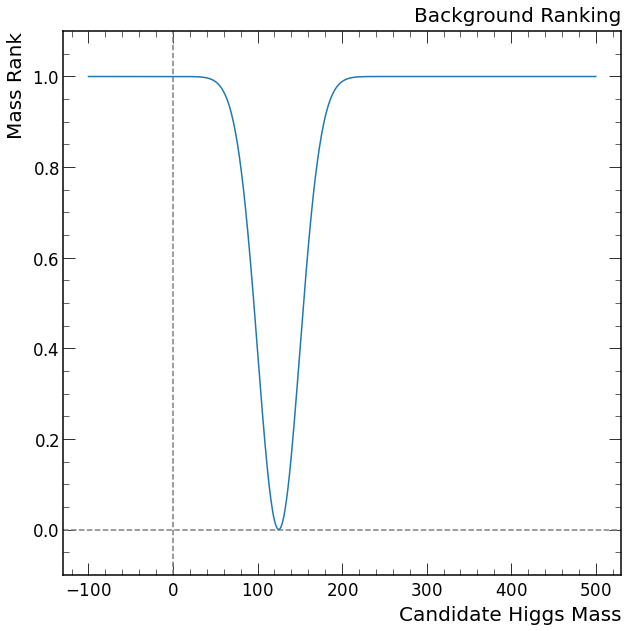

In [ ]:
fig, ax = plt.subplots()

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.plot(x, f)

ax.set_ylim(-0.1,1.1)

ax.set_title('Background Ranking')
ax.set_xlabel('Candidate Higgs Mass')
ax.set_ylabel('Mass Rank')

fig.savefig('plots/gnn/feynnet/bkg_mass_rank.pdf')

In [ ]:
from matplotlib.colors import BoundaryNorm
from matplotlib.patches import Circle

In [ ]:
# norm = BoundaryNorm(boundaries=np.array())

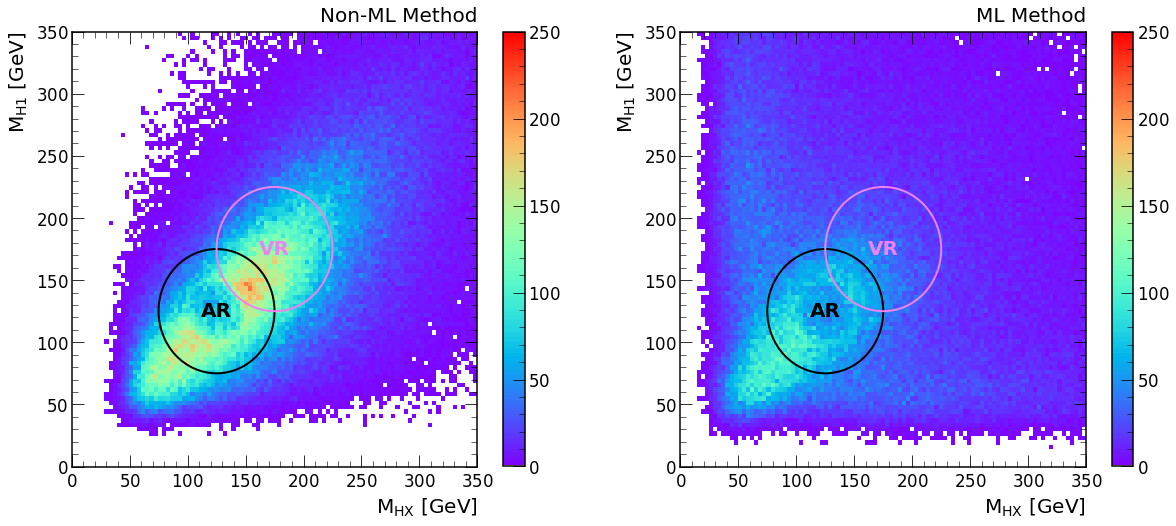

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ar_color = 'black'
vr_color = 'violet'

circle1 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle3 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(bias_data.HX.m[~bias_data.asr_mask], bias_data.H1.m[~bias_data.asr_mask], bins=np.linspace(0,350,100), ax=axs[0], vmax=250)
fig.colorbar(im, ax=axs[0])
axs[0].set_title('Non-ML Method')
axs[0].add_artist(circle1)
axs[0].add_artist(circle3)
axs[0].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[0].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

circle2 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle4 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(gnn_4b_data.HX.m[~gnn_4b_data.asr_mask], gnn_4b_data.H1.m[~gnn_4b_data.asr_mask], bins=np.linspace(0,350,100), ax=axs[1], vmax=250)
fig.colorbar(im, ax=axs[1])
axs[1].set_title('ML Method')
axs[1].add_artist(circle2)
axs[1].add_artist(circle4)
axs[1].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[1].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

for ax in axs.flatten():
    ax.set_xlabel(r'$M_{HX}$ [GeV]')
    ax.set_ylabel(r'$M_{H1}$ [GeV]')